# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
print("Hello World!")


Hello World!


In [53]:
from prophet import Prophet
import pandas as pd

# Load data
data = pd.read_excel('/home/stefan/PycharmProjects/LauzHack2024/BRISTOR_Zegoland.xlsx', sheet_name=None, header=0)

In [57]:
data['Share of Voice']

,Country,Products,Data type,Indication,Date,Value
0,Zegoland,BRISTOR,Share of voice,Indication A,févr-21,0.104353
1,Zegoland,BRISTOR,Share of voice,Indication A,mars-21,0.109600
2,Zegoland,BRISTOR,Share of voice,Indication A,avr-21,0.035310
3,Zegoland,BRISTOR,Share of voice,Indication A,mai-21,0.089040
4,Zegoland,BRISTOR,Share of voice,Indication A,juin-21,0.086283
...,...,...,...,...,...,...
155,Zegoland,Competitors,Share of voice,Indication A,janv-24,0.927625
156,Zegoland,Competitors,Share of voice,Indication A,févr-24,0.957622
157,Zegoland,Competitors,Share of voice,Indication A,mars-24,0.828850
158,Zegoland,Competitors,Share of voice,Indication A,avr-24,0.928734


In [9]:

# Extract relevant rows and columns
columns = data.iloc[5, 2:].values  # Extract column names starting from 'Ex-factory volumes'
time_periods = data.iloc[7, 2:].values  # Extract the time periods
metrics = data.iloc[8, 2:].values  # Extract the metrics
forecast_algorithms_info = data.iloc[9, 2:].values  # Additional info on forecast algorithms

# Prepare the data dictionary for relevant time series (e.g., "Ex-factory volumes")
data_dict = {
    'ds': pd.date_range(start='2020-08-01', end='2024-10-31', freq='ME'),  # Example for Ex-factory volumes
    'y': [100, 110, 120, 115, 105, 98, 130]  # Replace with actual data points for "Ex-factory volumes"
    # Add additional covariates here if they exist in the dataset
}

# Convert data dictionary into DataFrame
df = pd.DataFrame(data_dict)

# Add example external regressors (replace with real data if available)
df['demand_volumes'] = [20, 22, 25, 24, 23, 21, 26]  # Replace with actual Demand volumes data
df['activity'] = [5, 6, 7, 6, 5, 4, 8]  # Replace with actual Activity data
df['share_of_voice'] = [0.3, 0.35, 0.4, 0.37, 0.33, 0.3, 0.42]  # Replace with actual Share of Voice data

# Initialize Prophet model
model = Prophet()
model.add_regressor('demand_volumes')
model.add_regressor('activity')
model.add_regressor('share_of_voice')

# Fit the model
model.fit(df)

# Prepare future DataFrame
future = model.make_future_dataframe(periods=12, freq='M')  # Predict for the next 12 months
future['demand_volumes'] = [28, 30, 29, 27, 26, 32, 34, 31, 29, 30, 33, 35]  # Replace with forecasted Demand volumes
future['activity'] = [9, 10, 8, 7, 6, 9, 11, 12, 10, 9, 8, 10]  # Replace with forecasted Activity
future['share_of_voice'] = [0.45, 0.48, 0.46, 0.44, 0.43, 0.47, 0.49, 0.5, 0.48, 0.46, 0.44, 0.48]  # Replace with forecasted SoV

# Make predictions
forecast = model.predict(future)

# Display forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


ValueError: All arrays must be of the same length

In [21]:
import pandas as pd
from prophet import Prophet

# Mock dataset creation based on the previous description
# Assuming monthly data from August 2020 to October 2024 for "Ex-factory volumes"
date_range = pd.date_range(start="2020-08-01", end="2024-10-31", freq="M")
mock_data = {
    'ds': date_range,
    'y': [abs(100 + (x % 12) * 10 + (x % 5) * 5 - (x % 3) * 2) for x in range(len(date_range))],  # Mock 'Ex-factory volumes'
    'demand_volumes': [50 + (x % 12) * 2 for x in range(len(date_range))],  # Mock 'Demand volumes'
    'activity': [10 + (x % 6) * 3 for x in range(len(date_range))],  # Mock 'Activity'
    'share_of_voice': [0.3 + (x % 4) * 0.05 for x in range(len(date_range))],
    'competitor_impact': [0] * len(date_range)# Mock 'Share of Voice'
}

# Define competitor impact starting 6 months from the last date
event_start = pd.to_datetime("2025-04-01")
for i, date in enumerate(date_range):
    if date >= event_start:
        data['competitor_impact'][i] = -0.1  # Assuming a 10% drop in sales


# Convert to DataFrame
df = pd.DataFrame(mock_data)

/tmp/ipykernel_214344/420859901.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2020-08-01", end="2024-10-31", freq="M")


In [34]:

# Initialize the Prophet model
model = Prophet()
model.add_regressor('demand_volumes')
model.add_regressor('activity')
model.add_regressor('share_of_voice')
model.add_regressor('competitor_impact') # If a competitor releases a new product


# Fit the model
model.fit(df)

# Create future DataFrame
future = model.make_future_dataframe(periods=12, freq="M")  # Forecast for next 12 months
future['demand_volumes'] = [60 + (x % 12) * 2 for x in range(len(future))]  # Future 'Demand volumes'
future['activity'] = [15 + (x % 6) * 3 for x in range(len(future))]  # Future 'Activity'
future['share_of_voice'] = [0.4 + (x % 4) * 0.05 for x in range(len(future))]  # Future 'Share of Voice'

# Add the impact of the competitor in the future
for i, date in enumerate(future['ds']):
    if date >= event_start:
        future.loc[i, 'competitor_impact'] = -0.1  # Future impact
    else:
        future.loc[i, 'competitor_impact'] = 0
        
# Adjust SoV for competitor impact
for i, date in enumerate(future['ds']): # TODO fix the share of voice
    if date >= event_start:
        future.loc[i, 'share_of_voice'] *= 0.9  # Reduce SoV by 10%

# Make predictions
forecast = model.predict(future)

# Display forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)  # Last 12 rows for predictions


16:22:13 - cmdstanpy - INFO - Chain [1] start processing
16:22:13 - cmdstanpy - INFO - Chain [1] done processing
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
51,2024-11-30,432.328356,424.505707,439.789970
52,2024-12-31,450.185192,442.052606,457.642312
53,2025-01-31,445.921258,437.736477,453.441752
54,2025-02-28,463.110533,455.129206,471.198811
55,2025-03-31,476.023955,468.079431,483.730218
56,2025-04-30,382.053936,374.562879,389.870731
57,2025-05-31,378.236463,370.513772,386.369074
58,2025-06-30,371.039533,363.031950,379.003466
59,2025-07-31,368.718953,360.502785,376.575788
60,2025-08-31,302.702464,295.028958,310.243549


In [46]:
### Showing the model coefficients for each regression term 

# Number of Fourier terms for each seasonality
yearly_seasonality_order = 10  # Default if you didn't change `fourier_order`
weekly_seasonality_order = 3   # Default weekly seasonality (adjust if custom)

# Total seasonal terms
seasonal_terms = yearly_seasonality_order + weekly_seasonality_order

# Extract external regressor coefficients
external_regressor_coefficients = model.params['beta'][:, seasonal_terms:].flatten()  # Remove seasonal terms

# Map to the names of regressors
#regressor_names = ['adjusted_share_of_voice', 'activity']  # Your defined regressors
regressor_names = ['demand_volumes', 'activity', 'share_of_voice', 'competitor_impact', 'adjusted_share_of_voice']
relationship_df = pd.DataFrame({
    'Regressor': regressor_names,
    'Coefficient': external_regressor_coefficients[:len(regressor_names)]
})

print(relationship_df)


                 Regressor  Coefficient
0           demand_volumes    -0.024047
1                 activity     0.235947
2           share_of_voice     0.116732
3        competitor_impact     0.146291
4  adjusted_share_of_voice     0.046532


In [48]:
from statsmodels.api import OLS, add_constant

# Prepare data for regression
#X = df[['share_of_voice', 'activity']]  # Regressors
X = df[['demand_volumes', 'activity', 'share_of_voice', 'competitor_impact', 'share_of_voice']]
X = add_constant(X)  # Add intercept term
y = df['y']  # Sales

# Fit OLS regression
ols_model = OLS(y, X).fit()

# Display summary of the regression
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     353.6
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           3.06e-32
Time:                        16:55:20   Log-Likelihood:                -173.39
No. Observations:                  51   AIC:                             354.8
Df Residuals:                      47   BIC:                             362.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -137.3132     10.18

/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing

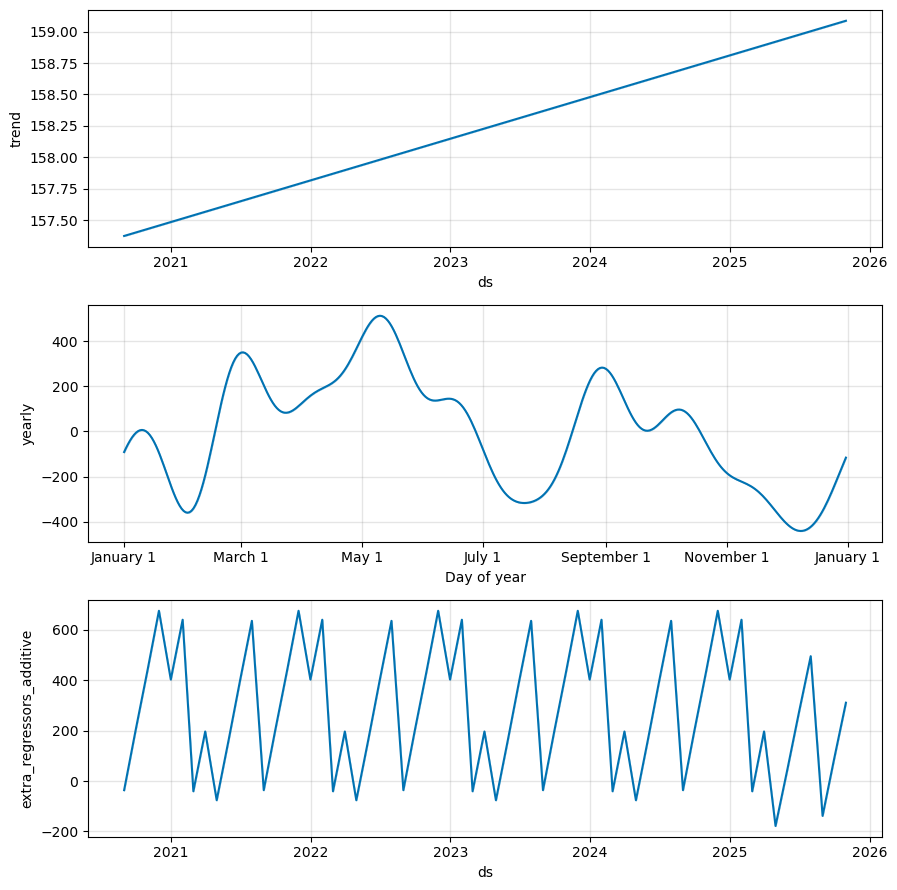

In [41]:
import matplotlib.pyplot as plt
# Decompose the forecast
forecast = model.predict(future)
model.plot_components(forecast)
plt.show()


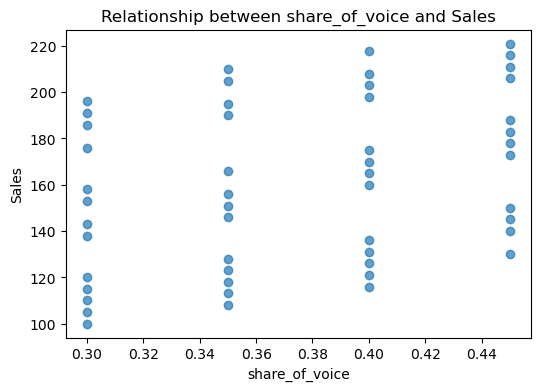

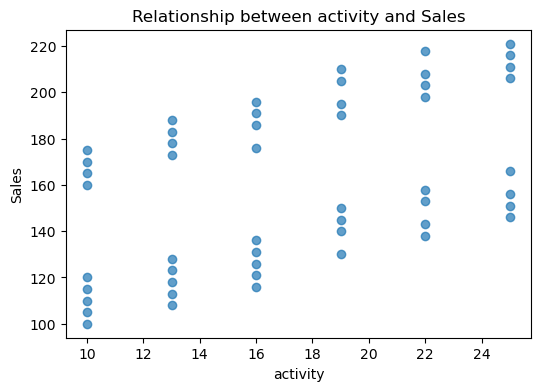

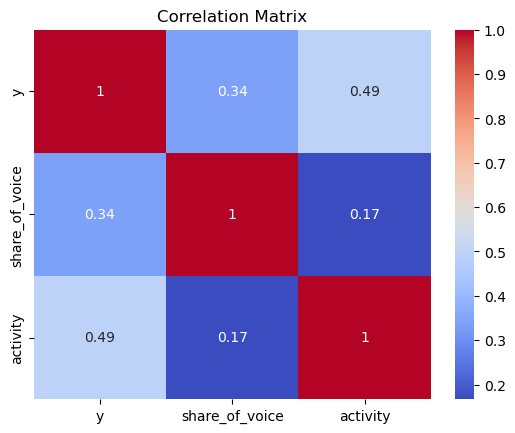

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplots for visual inspection
for regressor in ['share_of_voice', 'activity']:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[regressor], df['y'], alpha=0.7)
    plt.title(f'Relationship between {regressor} and Sales')
    plt.xlabel(regressor)
    plt.ylabel('Sales')
    plt.show()

# Correlation heatmap
correlation_matrix = df[['y', 'share_of_voice', 'activity']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwamodel_paramsrm')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Mock dataset creation based on the previous description
date_range = pd.date_range(start="2020-08-01", end="2024-10-31", freq="M")
mock_data = {
    'ds': date_range,
    'y': [abs(100 + (x % 12) * 10 + (x % 5) * 5 - (x % 3) * 2) for x in range(len(date_range))],  # Mock 'Ex-factory volumes'
    'demand_volumes': [50 + (x % 12) * 2 for x in range(len(date_range))],  # Mock 'Demand volumes'
    'activity': [10 + (x % 6) * 3 for x in range(len(date_range))],  # Mock 'Activity'
    'share_of_voice': [0.3 + (x % 4) * 0.05 for x in range(len(date_range))]  # Mock 'Share of Voice'
}

# Convert to DataFrame
df = pd.DataFrame(mock_data)

# Add lagged features for external regressors
df['demand_volumes_lag1'] = df['demand_volumes'].shift(1)
df['activity_lag1'] = df['activity'].shift(1)
df['share_of_voice_lag1'] = df['share_of_voice'].shift(1)

# Drop the first row with NaN values due to lagging
df = df.dropna()

# Prepare the model
endog = df['y']  # Target variable
exog = df[['demand_volumes_lag1', 'activity_lag1', 'share_of_voice_lag1']]  # External regressors

# Fit the ARIMA model with external regressors
model = SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Prepare future data for predictions
future_date_range = pd.date_range(start="2024-11-01", end="2025-10-31", freq="M")
future_data = pd.DataFrame({
    'ds': future_date_range,
    'demand_volumes': [60 + (x % 12) * 2 for x in range(len(future_date_range))],  # Future 'Demand volumes'
    'activity': [15 + (x % 6) * 3 for x in range(len(future_date_range))],  # Future 'Activity'
    'share_of_voice': [0.4 + (x % 4) * 0.05 for x in range(len(future_date_range))]  # Future 'Share of Voice'
})

# Add lagged features for future data
future_data['demand_volumes_lag1'] = future_data['demand_volumes'].shift(1)
future_data['activity_lag1'] = future_data['activity'].shift(1)
future_data['share_of_voice_lag1'] = future_data['share_of_voice'].shift(1)

# Use the last known data point to fill lagged values for the first row
future_data.iloc[0, future_data.columns.get_loc('demand_volumes_lag1')] = df.iloc[-1]['demand_volumes']
future_data.iloc[0, future_data.columns.get_loc('activity_lag1')] = df.iloc[-1]['activity']
future_data.iloc[0, future_data.columns.get_loc('share_of_voice_lag1')] = df.iloc[-1]['share_of_voice']

# Drop rows with NaN caused by lagging
future_data = future_data.dropna()

# Forecast
forecast = results.get_forecast(steps=len(future_data), exog=future_data[['demand_volumes_lag1', 'activity_lag1', 'share_of_voice_lag1']])
forecast_df = forecast.summary_frame()

# Display forecasted results
forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]


/tmp/ipykernel_214344/900112512.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2020-08-01", end="2024-10-31", freq="M")
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/stefan/miniconda3/envs/LauzHack2024

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15016D+00    |proj g|=  4.01911D-01

At iterate    5    f=  2.85540D+00    |proj g|=  6.43147D-02

At iterate   10    f=  2.78202D+00    |proj g|=  8.95612D-02

At iterate   15    f=  2.77007D+00    |proj g|=  4.84116D-03

At iterate   20    f=  2.76931D+00    |proj g|=  2.35847D-03

At iterate   25    f=  2.76926D+00    |proj g|=  3.73680D-04

At iterate   30    f=  2.76923D+00    |proj g|=  4.20186D-04

At iterate   35    f=  2.76906D+00    |proj g|=  1.72575D-03

At iterate   40    f=  2.76897D+00    |proj g|=  4.50654D-04

At iterate   45    f=  2.76558D+00    |proj g|=  2.99580D-02

At iterate   50    f=  2.76301D+00    |proj g|=  1.26948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_214344/900112512.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date_range = pd.date_range(start="2024-11-01", end="2025-10-31", freq="M")
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an except

y,mean,mean_ci_lower,mean_ci_upper
50,137.455582,122.034140,152.877024
51,1335.265628,1319.814041,1350.717215
52,1341.549560,1326.054998,1357.044123
53,1349.902287,1334.413972,1365.390603
54,4560.498375,4545.008849,4575.987901
55,4562.697659,4547.208402,4578.186917
56,4585.545377,4570.055809,4601.034946
57,1393.517488,1378.029419,1409.005557
58,1395.718610,1380.222867,1411.214353
59,1295.416034,1279.975915,1310.856153


In [16]:
forecast_df

y,mean,mean_se,mean_ci_lower,mean_ci_upper
50,137.455582,7.868227,122.034140,152.877024
51,1335.265628,7.883608,1319.814041,1350.717215
52,1341.549560,7.905534,1326.054998,1357.044123
53,1349.902287,7.902347,1334.413972,1365.390603
54,4560.498375,7.902965,4545.008849,4575.987901
55,4562.697659,7.902828,4547.208402,4578.186917
56,4585.545377,7.902986,4570.055809,4601.034946
57,1393.517488,7.902221,1378.029419,1409.005557
58,1395.718610,7.906137,1380.222867,1411.214353
59,1295.416034,7.877757,1279.975915,1310.856153
